In [1]:
pip install pyston 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyston (from versions: none)
ERROR: No matching distribution found for pyston

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [47 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 8 threads.
  matplotlib data path: C:\Users\baral\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
  CONFIGDIR=C:\Users\baral\.matplotlib
  interactive is False
  platform is win32
  loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', 'types', 'importlib._bootstrap', 'impo

In [3]:
! conda install -c conda-forge fbprophet

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [209]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.statistics import plot_acf, check_seasonality
from darts.metrics import r2_score, rmse
from darts.datasets import EnergyDataset


In [104]:
df = pd.read_csv('final/clean_df_2022.csv', index_col=0 )

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8760 non-null   object 
 1   Price   8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 205.3+ KB


In [106]:
df.head()

,date,Price
0,01.01.2022 00:00,50.05
1,01.01.2022 01:00,41.33
2,01.01.2022 02:00,43.22
3,01.01.2022 03:00,45.46
4,01.01.2022 04:00,37.67


In [107]:
df.tail()

,date,Price
8756,31.12.2022 19:00,67.01
8757,31.12.2022 20:00,40.50
8758,31.12.2022 21:00,14.89
8759,31.12.2022 22:00,9.94
8760,31.12.2022 23:00,4.84


In [108]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M')

In [109]:
df.columns = ['ds', 'y']

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8760 non-null   datetime64[ns]
 1   y       8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 205.3 KB


Train size :  5833
Test size  :  2927



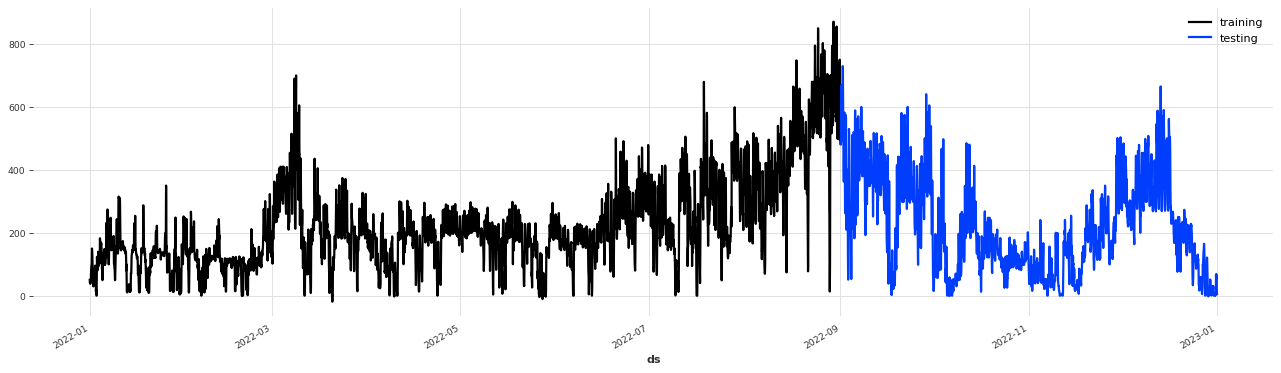

In [196]:
series = TimeSeries.from_dataframe(df, time_col='ds', value_cols = 'y', fill_missing_dates=True, freq=None)

# dart recommendation, splitting dataset into train ad test
# 9 month train and 3 m  test
# no random split as the data is timeseries data
train, test = series.split_before(pd.Timestamp("09.01.2022 01:00"))
print("Train size : ", len(train))
print("Test size  : ", len(test))
print()

plt.figure(figsize=(20, 5), dpi=80)
train.plot(label="training")
test.plot(label="testing")
plt.show()

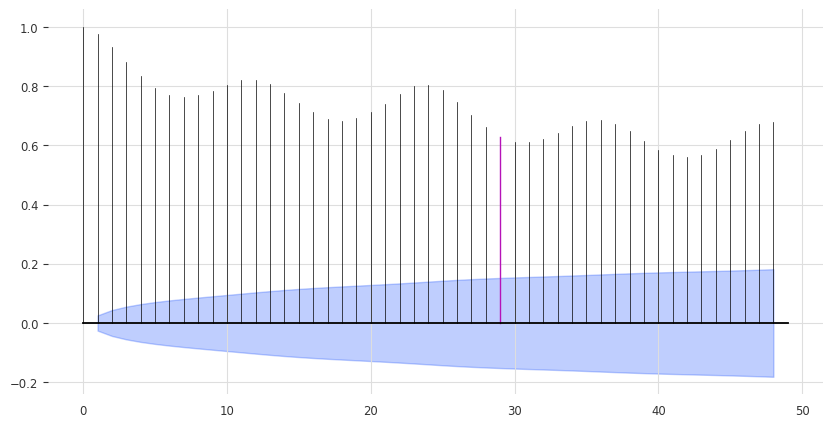

In [138]:
plot_acf(train, m=29, max_lag=48)

In [137]:
check_seasonality(train, m=24, max_lag=48)

# "max lag" refers to the maximum number of time steps or periods that you want to consider when analyzing the relationship between data points in a time series. It represents the farthest point in the past that you believe may have an impact on the current value of the series.

# For example, if you are analyzing daily temperature data and you set the max lag to 7, it means you are considering the temperature values of the past seven days to potentially influence the current day's temperature.

# In our case, we have hourly prices which we belive might be impacted from last days value as well. So, we will be using 48 as our max lag. 


# "m" refers to the seasonality period or the length of a seasonal cycle within the data. It represents the number of time steps or periods required for the series to repeat its pattern. In our case the prices might repeat every 24 hours, so we have m set to 24.

(True, 24)

In [125]:
from darts.models.forecasting.prophet_model import Prophet

In [197]:
season=({'name': 'Price',
         'seasonal_periods': 24, 
         'fourier_order':1000})

In [ ]:
(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None, **prophet_kwargs)[source]¶

In [198]:
model= Prophet(add_seasonalities = season)

In [199]:
model.fit(train)

16:08:01 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities={'name': 'Price', 'seasonal_periods': 24, 'fourier_order': 1000}, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [ ]:
#future_days = model.make_future_dataframe(periods = len(test), freq = 'H') # 3600 sec = 1 hr

In [212]:
pred_normal = model.predict(len(test))

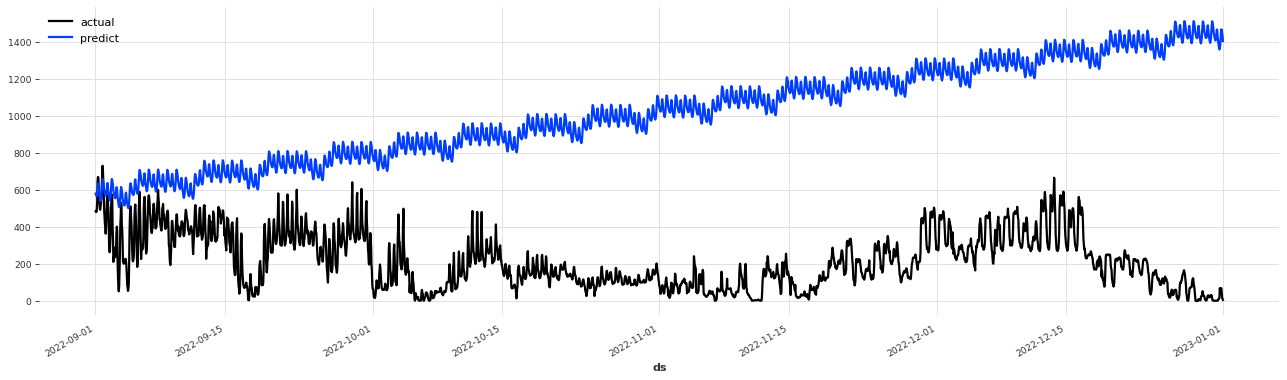

In [213]:
plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred_normal.plot(label="predict")
plt.show()

In [214]:
prophet_rmse_normal = rmse(test, pred_normal)
prophet_r2_normal   = r2_score(test, pred_normal)

In [215]:
print("RMSE : ", prophet_rmse_normal)
print("R2 score : ", prophet_r2_normal)

# this one is not god so trying historical forecast

RMSE :  860.5173714769303
R2 score :  -32.43938513611232


In [201]:
series

<TimeSeries (DataArray) (ds: 8760, component: 1, sample: 1)>
array([[[50.05]],

       [[41.33]],

       [[43.22]],

       ...,

       [[14.89]],

       [[ 9.94]],

       [[ 4.84]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [206]:
pred = model.historical_forecasts(series= series, forecast_horizon=24, 
                                         stride=24, 
                                         train_length=336, 
                                         start=pd.Timestamp("09.01.2022 01:00"), 
                                         verbose=False)

16:17:12 - cmdstanpy - INFO - Chain [1] start processing
16:17:13 - cmdstanpy - INFO - Chain [1] done processing
16:17:15 - cmdstanpy - INFO - Chain [1] start processing
16:17:17 - cmdstanpy - INFO - Chain [1] done processing
16:17:19 - cmdstanpy - INFO - Chain [1] start processing
16:17:21 - cmdstanpy - INFO - Chain [1] done processing
16:17:23 - cmdstanpy - INFO - Chain [1] start processing
16:17:25 - cmdstanpy - INFO - Chain [1] done processing
16:17:27 - cmdstanpy - INFO - Chain [1] start processing
16:17:29 - cmdstanpy - INFO - Chain [1] done processing
16:17:31 - cmdstanpy - INFO - Chain [1] start processing
16:17:32 - cmdstanpy - INFO - Chain [1] done processing
16:17:34 - cmdstanpy - INFO - Chain [1] start processing
16:17:36 - cmdstanpy - INFO - Chain [1] done processing
16:17:38 - cmdstanpy - INFO - Chain [1] start processing
16:17:39 - cmdstanpy - INFO - Chain [1] done processing
16:17:42 - cmdstanpy - INFO - Chain [1] start processing
16:17:43 - cmdstanpy - INFO - Chain [1]

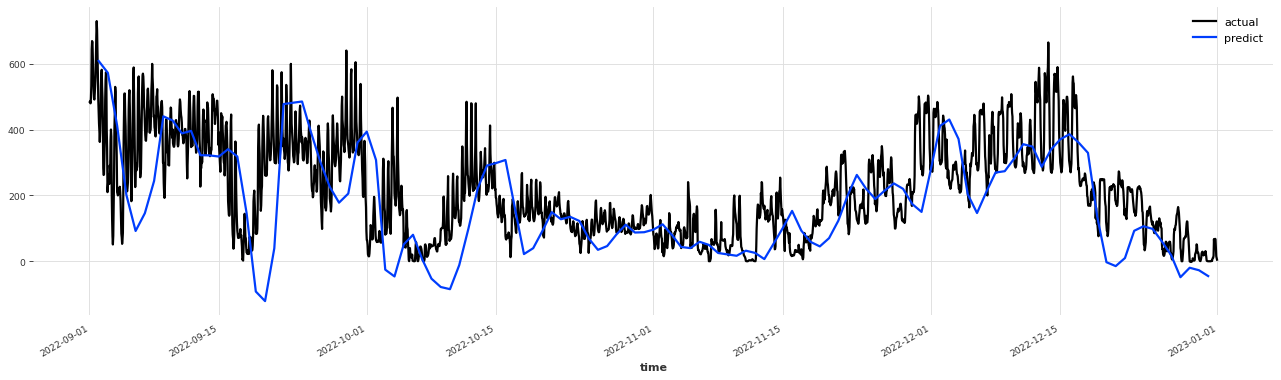

In [207]:
plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred.plot(label="predict")
plt.show()

In [210]:
prophet_rmse = rmse(test, pred)
prophet_r2   = r2_score(test, pred)

In [211]:
print("RMSE : ", prophet_rmse)
print("R2 score : ", prophet_r2)

RMSE :  117.61991983938432
R2 score :  0.001016777416122272
